In [1]:
import pandas as pd  
import numpy as np
import os
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import seaborn as sns
import warnings
import plotly.graph_objects as go

warnings.filterwarnings('ignore')

In [2]:
# Load dữ liệu
df_WHO = pd.read_csv('Dataset/Life Expectancy Data.csv', delimiter=',')
df_WHO.dataframeName = 'Life Expectancy Data.csv'

# Làm sạch dữ liệu

## Xử lý giá trị null 

In [3]:
# Đổi lại tên 1 số cột cho có khoảng cách và dễ nhìn hơn.
df_WHO.rename(columns={" BMI ":"BMI","Life expectancy ":"Life_Expectancy","Adult Mortality":"Adult_Mortality",
                   "infant deaths":"Infant_Deaths","percentage expenditure":"Percentage_Exp","Hepatitis B":"HepatitisB",
                  "Measles ":"Measles"," BMI ":"BMI","under-five deaths ":"Under_Five_Deaths","Diphtheria ":"Diphtheria",
                  " HIV/AIDS":"HIV/AIDS"," thinness  1-19 years":"thinness_1to19_years"," thinness 5-9 years":"thinness_5to9_years","Income composition of resources":"Income_Comp_Of_Resources",
                   "Total expenditure":"Tot_Exp"},inplace=True)

In [4]:
df_WHO.describe()

,Year,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,Measles,BMI,Under_Five_Deaths,Polio,Tot_Exp,Diphtheria,HIV/AIDS,GDP,Population,thinness_1to19_years,thinness_5to9_years,Income_Comp_Of_Resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [5]:
df_WHO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   2938 non-null   object 
 1   Year                      2938 non-null   int64  
 2   Status                    2938 non-null   object 
 3   Life_Expectancy           2928 non-null   float64
 4   Adult_Mortality           2928 non-null   float64
 5   Infant_Deaths             2938 non-null   int64  
 6   Alcohol                   2744 non-null   float64
 7   Percentage_Exp            2938 non-null   float64
 8   HepatitisB                2385 non-null   float64
 9   Measles                   2938 non-null   int64  
 10  BMI                       2904 non-null   float64
 11  Under_Five_Deaths         2938 non-null   int64  
 12  Polio                     2919 non-null   float64
 13  Tot_Exp                   2712 non-null   float64
 14  Diphther

In [6]:
# Phần trăm null của mỗi cột
df_WHO.isnull().sum()*100/df_WHO.isnull().count()

Country                      0.000000
Year                         0.000000
Status                       0.000000
Life_Expectancy              0.340368
Adult_Mortality              0.340368
Infant_Deaths                0.000000
Alcohol                      6.603131
Percentage_Exp               0.000000
HepatitisB                  18.822328
Measles                      0.000000
BMI                          1.157250
Under_Five_Deaths            0.000000
Polio                        0.646698
Tot_Exp                      7.692308
Diphtheria                   0.646698
HIV/AIDS                     0.000000
GDP                         15.248468
Population                  22.191967
thinness_1to19_years         1.157250
thinness_5to9_years          1.157250
Income_Comp_Of_Resources     5.684139
Schooling                    5.547992
dtype: float64

In [7]:
ds_country = df_WHO.Country.unique()
ds_fill = ['Life_Expectancy',
'Adult_Mortality','Alcohol','HepatitisB','BMI','Polio','Tot_Exp','Diphtheria',
'GDP','Population','thinness_1to19_years','thinness_5to9_years','Income_Comp_Of_Resources','Schooling']

In [8]:
# Xử lý các giá trị null bằng interpolation.
for country in ds_country:
    df_WHO.loc[df_WHO['Country'] == country,ds_fill] = df_WHO.loc[df_WHO['Country'] == country,ds_fill].interpolate()
    
# Bỏ các giá trị null còn lại sau khi dùng interpolation
df_WHO.dropna(inplace=True)

In [9]:
# Xác minh giá trị null
df_WHO.isnull().sum()

Country                     0
Year                        0
Status                      0
Life_Expectancy             0
Adult_Mortality             0
Infant_Deaths               0
Alcohol                     0
Percentage_Exp              0
HepatitisB                  0
Measles                     0
BMI                         0
Under_Five_Deaths           0
Polio                       0
Tot_Exp                     0
Diphtheria                  0
HIV/AIDS                    0
GDP                         0
Population                  0
thinness_1to19_years        0
thinness_5to9_years         0
Income_Comp_Of_Resources    0
Schooling                   0
dtype: int64

## Xử lý outlier

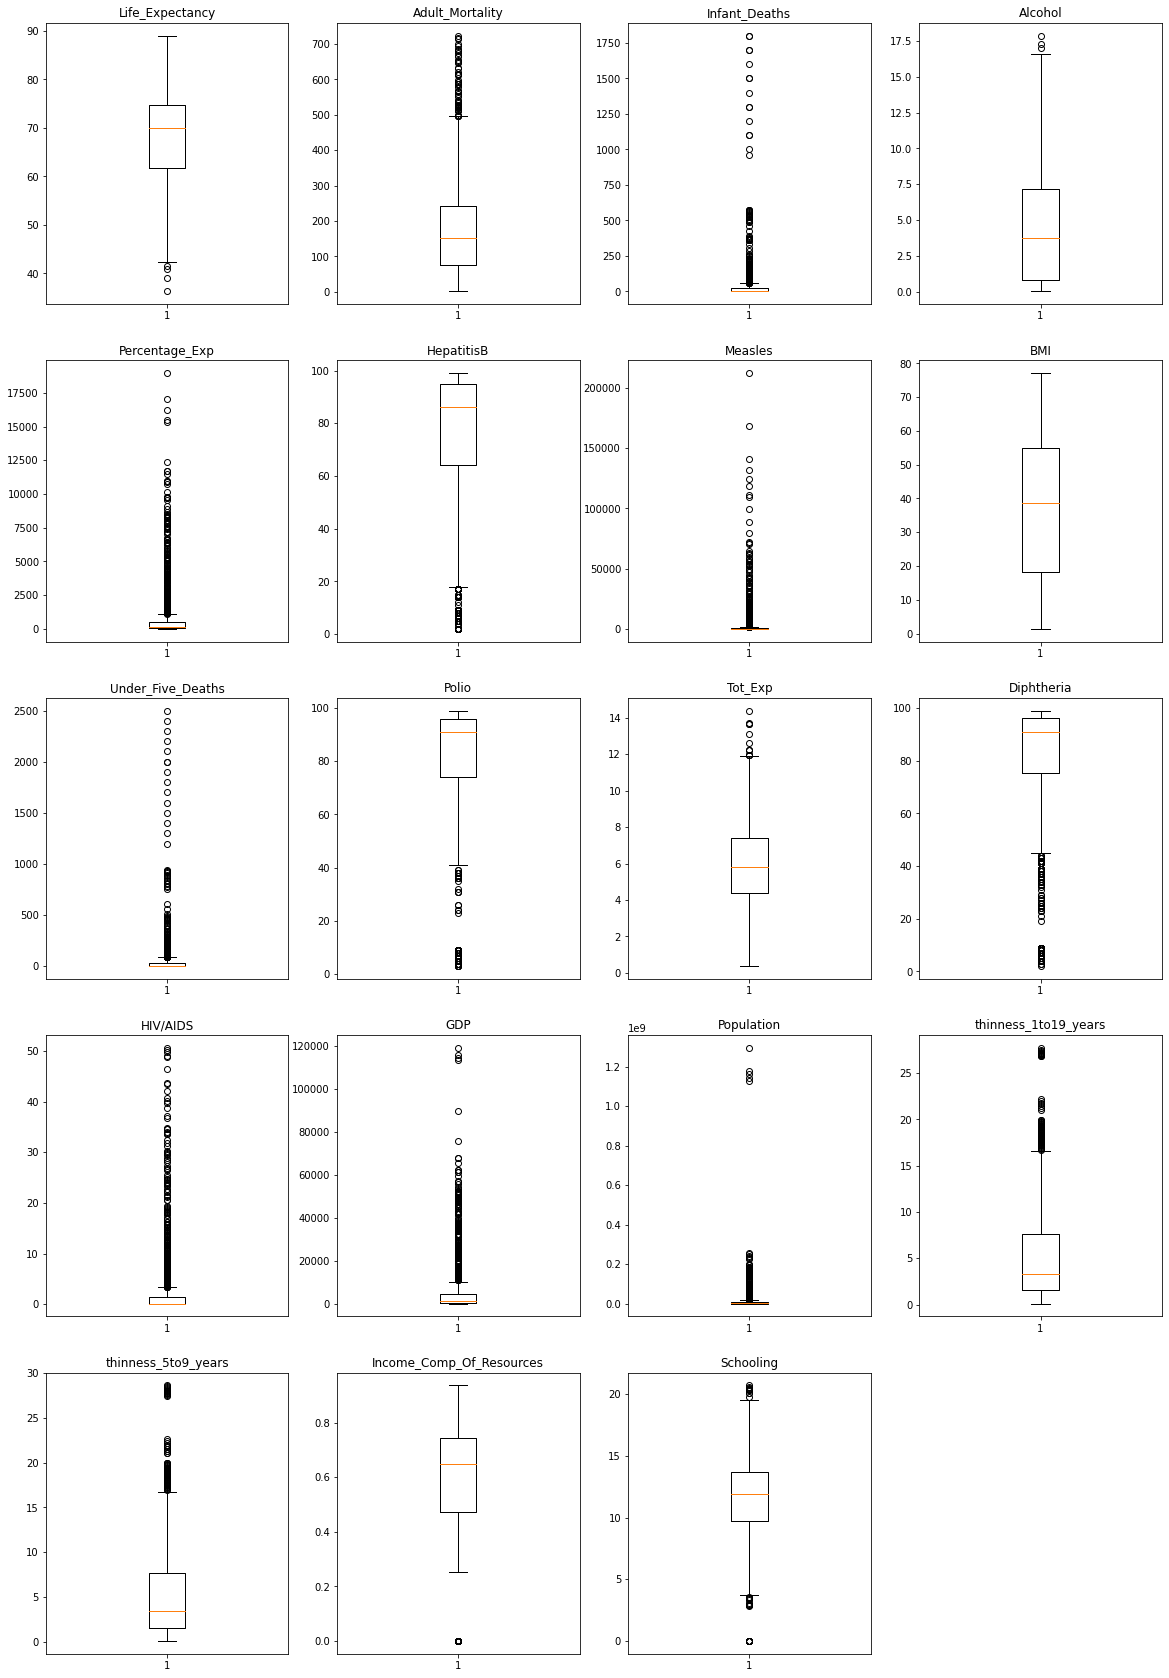

In [10]:
# Tạo từ điển cho các cột
col_dict = {'Life_Expectancy':1,'Adult_Mortality':2,'Infant_Deaths':3,'Alcohol':4,'Percentage_Exp':5,'HepatitisB':6,'Measles':7,'BMI':8,'Under_Five_Deaths':9,'Polio':10,'Tot_Exp':11,'Diphtheria':12,'HIV/AIDS':13,'GDP':14,'Population':15,'thinness_1to19_years':16,'thinness_5to9_years':17,'Income_Comp_Of_Resources':18,'Schooling':19}

# Phát hiện các outlier bằng cách dùng box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(df_WHO[variable],whis=1.5)
                     plt.title(variable)

plt.show()

In [11]:
# Tính outlier và phần trăm của outlier
for variable in col_dict.keys():
    q75, q25 = np.percentile(df_WHO[variable], [75 ,25])
    iqr = q75 - q25

    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    print("Số lượng outlier và phần trăm của nó {} : {} và {}".format(variable,
    len((np.where((df_WHO[variable] > max_val) | 
    (df_WHO[variable] < min_val))[0])),len((np.where((df_WHO[variable] > max_val) | 
    (df_WHO[variable] < min_val))[0]))*100/1987))

Số lượng outlier và phần trăm của nó Life_Expectancy : 4 và 0.20130850528434827
Số lượng outlier và phần trăm của nó Adult_Mortality : 58 và 2.9189733266230498
Số lượng outlier và phần trăm của nó Infant_Deaths : 198 và 9.96477101157524
Số lượng outlier và phần trăm của nó Alcohol : 3 và 0.1509813789632612
Số lượng outlier và phần trăm của nó Percentage_Exp : 232 và 11.675893306492199
Số lượng outlier và phần trăm của nó HepatitisB : 216 và 10.870659285354806
Số lượng outlier và phần trăm của nó Measles : 361 và 18.16809260191243
Số lượng outlier và phần trăm của nó BMI : 0 và 0.0
Số lượng outlier và phần trăm của nó Under_Five_Deaths : 227 và 11.424257674886764
Số lượng outlier và phần trăm của nó Polio : 159 và 8.002013085052843
Số lượng outlier và phần trăm của nó Tot_Exp : 13 và 0.6542526421741318
Số lượng outlier và phần trăm của nó Diphtheria : 195 và 9.813789632611979
Số lượng outlier và phần trăm của nó HIV/AIDS : 309 và 15.551082033215904
Số lượng outlier và phần trăm của nó G

In [12]:
# import thư viện sử dụng winsorize
from scipy.stats.mstats import winsorize

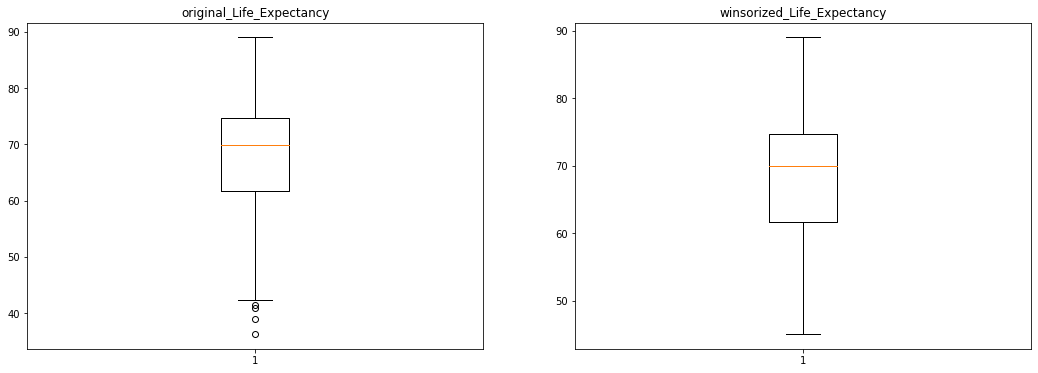

In [13]:
# Loại bỏ ouliers

plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Life_Expectancy = df_WHO['Life_Expectancy']
plt.boxplot(original_Life_Expectancy)
plt.title("original_Life_Expectancy")

plt.subplot(1,2,2)
winsorized_Life_Expectancy = winsorize(df_WHO['Life_Expectancy'],(0.01,0))
plt.boxplot(winsorized_Life_Expectancy)
plt.title("winsorized_Life_Expectancy")

plt.show()


# Tương tự làm với các cột khác

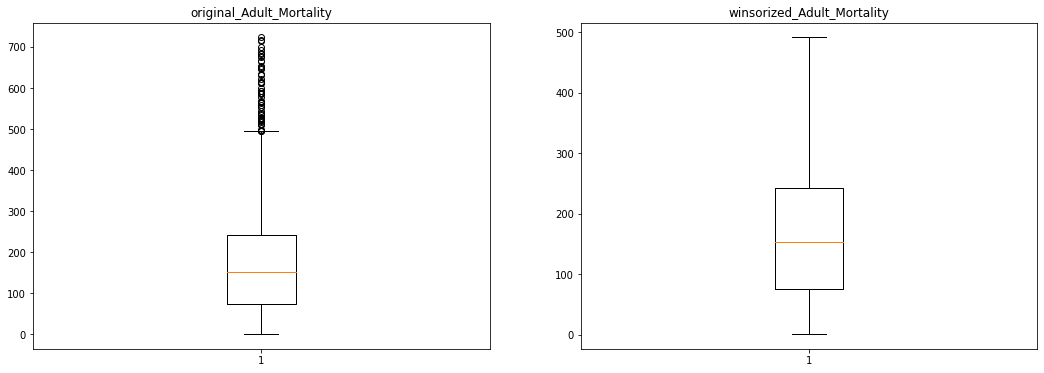

In [14]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Adult_Mortality = df_WHO['Adult_Mortality']
plt.boxplot(original_Adult_Mortality)
plt.title("original_Adult_Mortality")

plt.subplot(1,2,2)
winsorized_Adult_Mortality = winsorize(df_WHO['Adult_Mortality'],(0,0.03))
plt.boxplot(winsorized_Adult_Mortality)
plt.title("winsorized_Adult_Mortality")

plt.show()

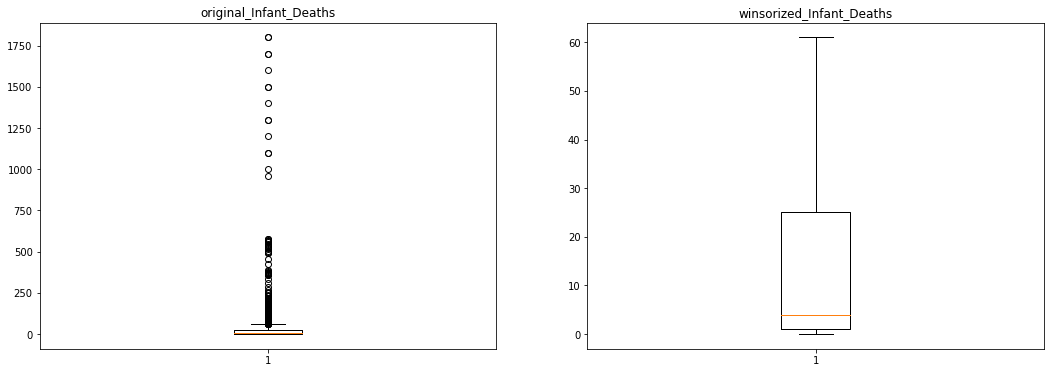

In [15]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Infant_Deaths = df_WHO['Infant_Deaths']
plt.boxplot(original_Infant_Deaths)
plt.title("original_Infant_Deaths")

plt.subplot(1,2,2)
winsorized_Infant_Deaths = winsorize(df_WHO['Infant_Deaths'],(0,0.10))
plt.boxplot(winsorized_Infant_Deaths)
plt.title("winsorized_Infant_Deaths")

plt.show()

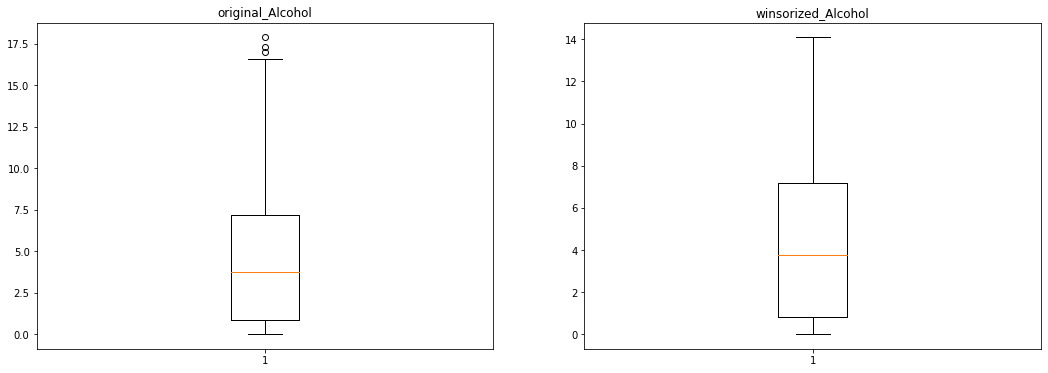

In [16]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Alcohol = df_WHO['Alcohol']
plt.boxplot(original_Alcohol)
plt.title("original_Alcohol")

plt.subplot(1,2,2)
winsorized_Alcohol = winsorize(df_WHO['Alcohol'],(0,0.01))
plt.boxplot(winsorized_Alcohol)
plt.title("winsorized_Alcohol")

plt.show()

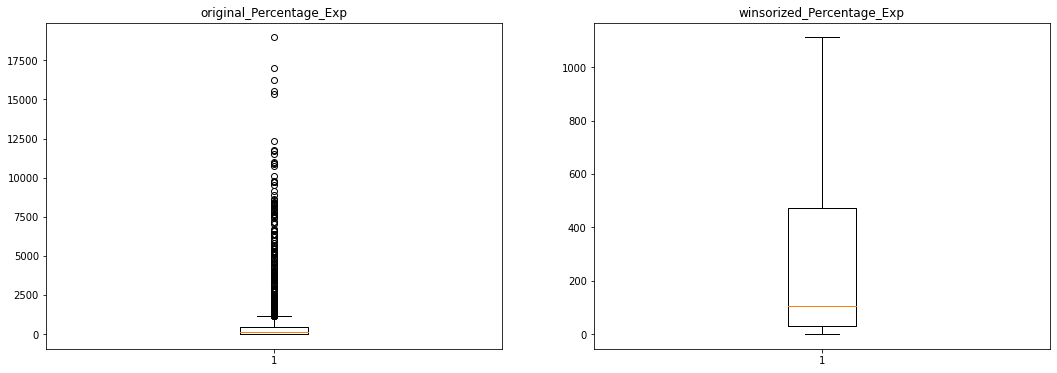

In [17]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Percentage_Exp = df_WHO['Percentage_Exp']
plt.boxplot(original_Percentage_Exp)
plt.title("original_Percentage_Exp")

plt.subplot(1,2,2)
winsorized_Percentage_Exp = winsorize(df_WHO['Percentage_Exp'],(0,0.12))
plt.boxplot(winsorized_Percentage_Exp)
plt.title("winsorized_Percentage_Exp")

plt.show()

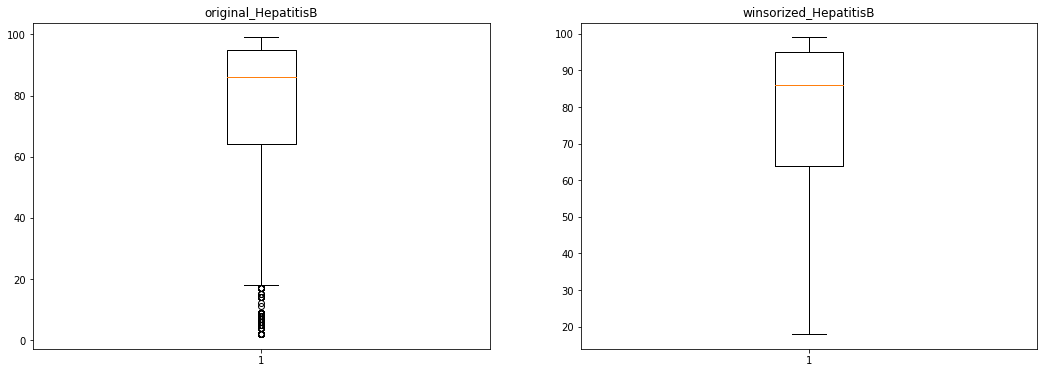

In [18]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_HepatitisB = df_WHO['HepatitisB']
plt.boxplot(original_HepatitisB)
plt.title("original_HepatitisB")

plt.subplot(1,2,2)
winsorized_HepatitisB = winsorize(df_WHO['HepatitisB'],(0.11,0))
plt.boxplot(winsorized_HepatitisB)
plt.title("winsorized_HepatitisB")

plt.show()

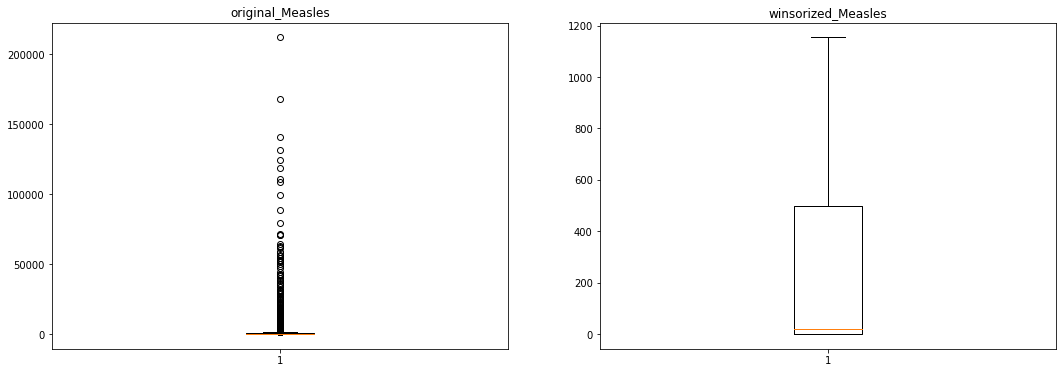

In [19]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Measles = df_WHO['Measles']
plt.boxplot(original_Measles)
plt.title("original_Measles")

plt.subplot(1,2,2)
winsorized_Measles = winsorize(df_WHO['Measles'],(0,0.19))
plt.boxplot(winsorized_Measles)
plt.title("winsorized_Measles")

plt.show()


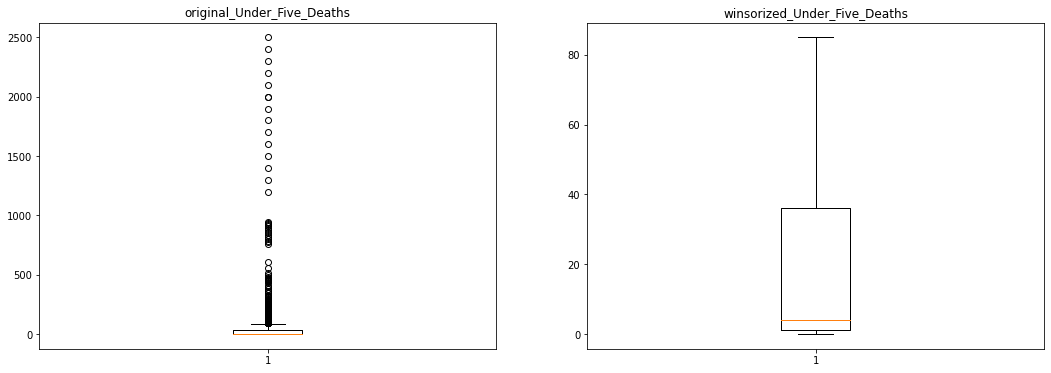

In [20]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Under_Five_Deaths = df_WHO['Under_Five_Deaths']
plt.boxplot(original_Under_Five_Deaths)
plt.title("original_Under_Five_Deaths")

plt.subplot(1,2,2)
winsorized_Under_Five_Deaths = winsorize(df_WHO['Under_Five_Deaths'],(0,0.12))
plt.boxplot(winsorized_Under_Five_Deaths)
plt.title("winsorized_Under_Five_Deaths")

plt.show()

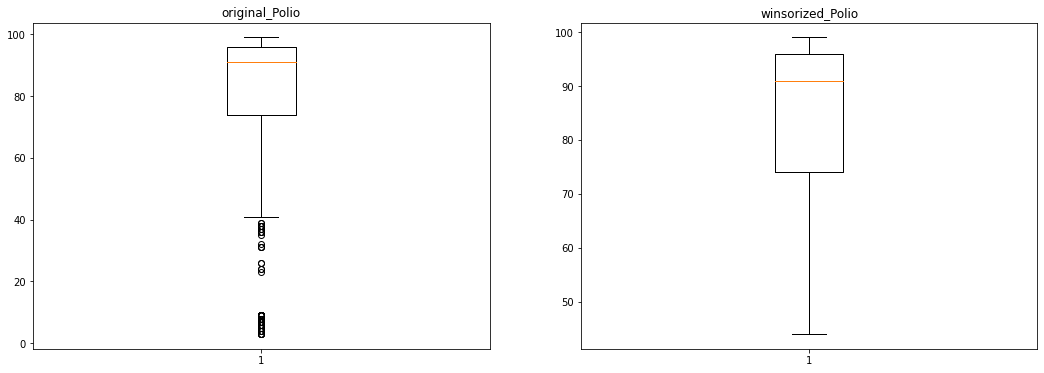

In [21]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Polio = df_WHO['Polio']
plt.boxplot(original_Polio)
plt.title("original_Polio")

plt.subplot(1,2,2)
winsorized_Polio = winsorize(df_WHO['Polio'],(0.09,0))
plt.boxplot(winsorized_Polio)
plt.title("winsorized_Polio")

plt.show()

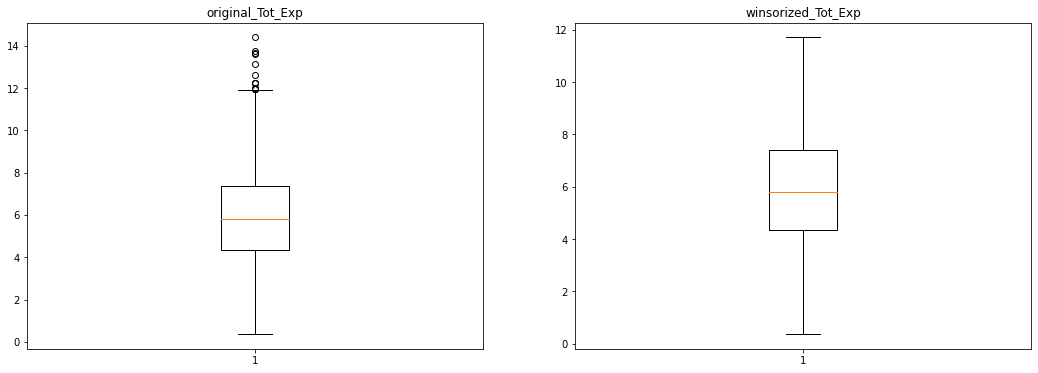

In [22]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Tot_Exp = df_WHO['Tot_Exp']
plt.boxplot(original_Tot_Exp)
plt.title("original_Tot_Exp")

plt.subplot(1,2,2)
winsorized_Tot_Exp = winsorize(df_WHO['Tot_Exp'],(0,0.01))
plt.boxplot(winsorized_Tot_Exp)
plt.title("winsorized_Tot_Exp")

plt.show()

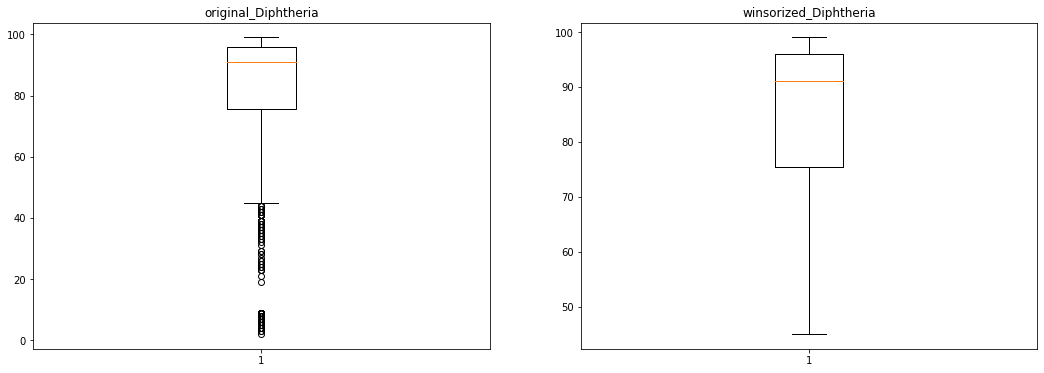

In [23]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Diphtheria = df_WHO['Diphtheria']
plt.boxplot(original_Diphtheria)
plt.title("original_Diphtheria")

plt.subplot(1,2,2)
winsorized_Diphtheria = winsorize(df_WHO['Diphtheria'],(0.10,0))
plt.boxplot(winsorized_Diphtheria)
plt.title("winsorized_Diphtheria")

plt.show()

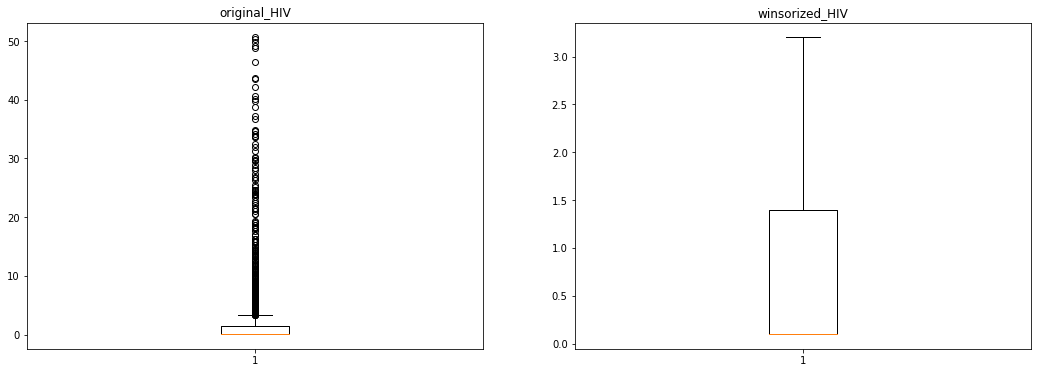

In [24]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_HIV = df_WHO['HIV/AIDS']
plt.boxplot(original_HIV)
plt.title("original_HIV")

plt.subplot(1,2,2)
winsorized_HIV = winsorize(df_WHO['HIV/AIDS'],(0,0.16))
plt.boxplot(winsorized_HIV)
plt.title("winsorized_HIV")

plt.show()

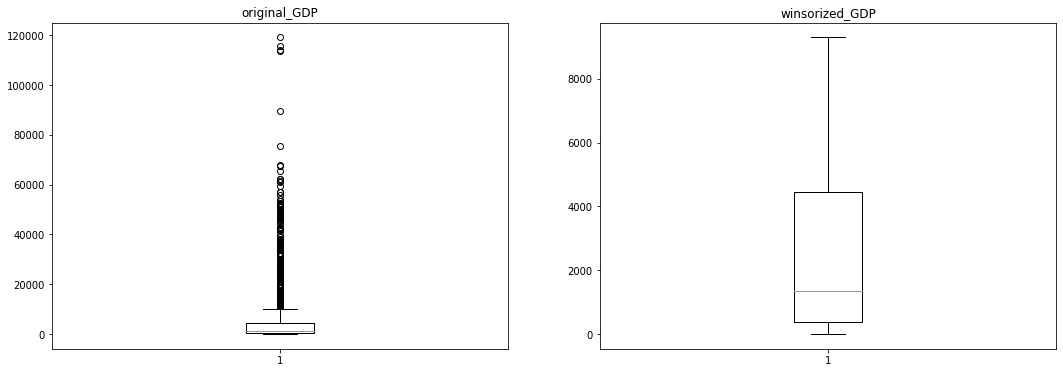

In [25]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_GDP = df_WHO['GDP']
plt.boxplot(original_GDP)
plt.title("original_GDP")

plt.subplot(1,2,2)
winsorized_GDP = winsorize(df_WHO['GDP'],(0,0.13))
plt.boxplot(winsorized_GDP)
plt.title("winsorized_GDP")

plt.show()

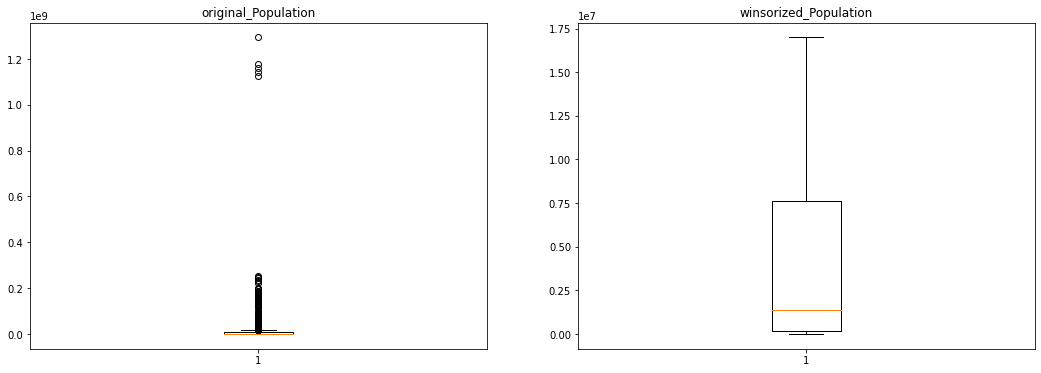

In [26]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Population = df_WHO['Population']
plt.boxplot(original_Population)
plt.title("original_Population")

plt.subplot(1,2,2)
winsorized_Population = winsorize(df_WHO['Population'],(0,0.14))
plt.boxplot(winsorized_Population)
plt.title("winsorized_Population")

plt.show()

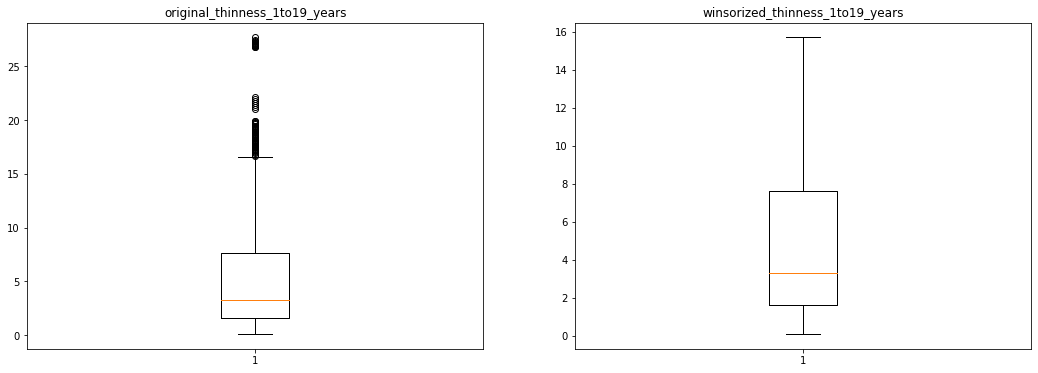

In [27]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_thinness_1to19_years = df_WHO['thinness_1to19_years']
plt.boxplot(original_thinness_1to19_years)
plt.title("original_thinness_1to19_years")

plt.subplot(1,2,2)
winsorized_thinness_1to19_years = winsorize(df_WHO['thinness_1to19_years'],(0,0.04))
plt.boxplot(winsorized_thinness_1to19_years)
plt.title("winsorized_thinness_1to19_years")

plt.show()

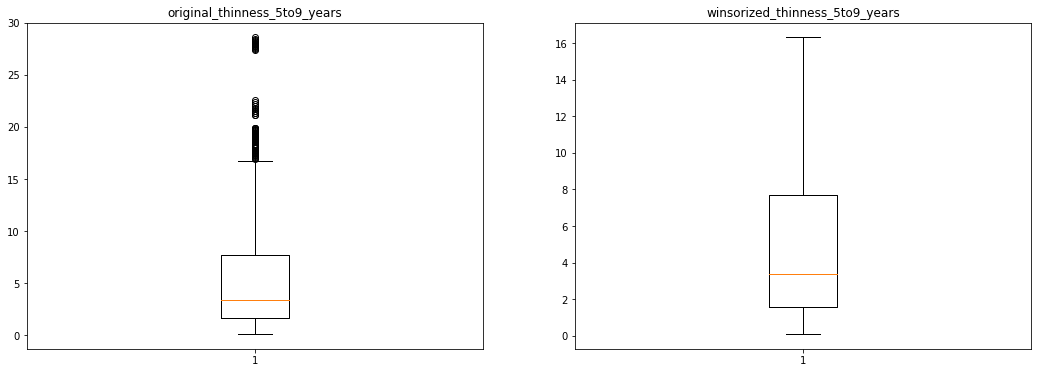

In [28]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_thinness_5to9_years = df_WHO['thinness_5to9_years']
plt.boxplot(original_thinness_5to9_years)
plt.title("original_thinness_5to9_years")

plt.subplot(1,2,2)
winsorized_thinness_5to9_years = winsorize(df_WHO['thinness_5to9_years'],(0,0.04))
plt.boxplot(winsorized_thinness_5to9_years)
plt.title("winsorized_thinness_5to9_years")

plt.show()

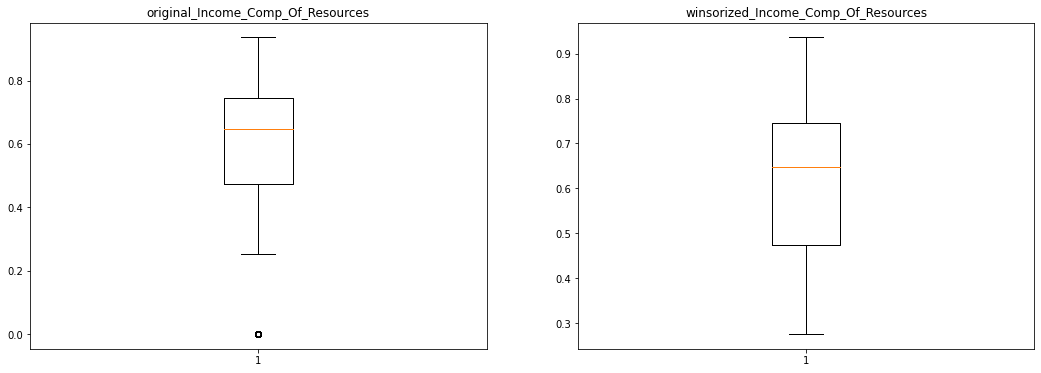

In [29]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Income_Comp_Of_Resources = df_WHO['Income_Comp_Of_Resources']
plt.boxplot(original_Income_Comp_Of_Resources)
plt.title("original_Income_Comp_Of_Resources")

plt.subplot(1,2,2)
winsorized_Income_Comp_Of_Resources = winsorize(df_WHO['Income_Comp_Of_Resources'],(0.05,0))
plt.boxplot(winsorized_Income_Comp_Of_Resources)
plt.title("winsorized_Income_Comp_Of_Resources")

plt.show()

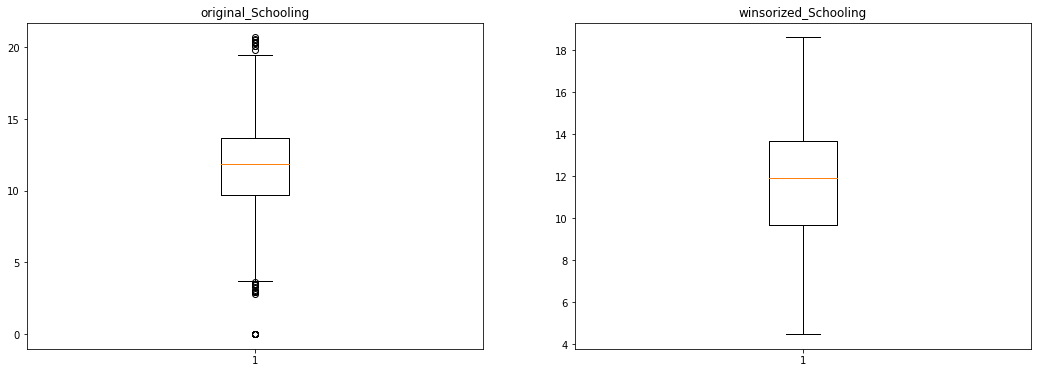

In [30]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Schooling = df_WHO['Schooling']
plt.boxplot(original_Schooling)
plt.title("original_Schooling")

plt.subplot(1,2,2)
winsorized_Schooling = winsorize(df_WHO['Schooling'],(0.02,0.01))
plt.boxplot(winsorized_Schooling)
plt.title("winsorized_Schooling")

plt.show()

In [31]:
ds_clean_data = [winsorized_Life_Expectancy,winsorized_Adult_Mortality,
winsorized_Infant_Deaths,winsorized_Alcohol,
winsorized_Percentage_Exp,winsorized_HepatitisB,winsorized_Under_Five_Deaths,winsorized_Polio,
winsorized_Tot_Exp,winsorized_Diphtheria,winsorized_HIV,winsorized_GDP,
winsorized_Population,winsorized_thinness_1to19_years,
winsorized_thinness_5to9_years,winsorized_Income_Comp_Of_Resources,
winsorized_Schooling]

for variable in ds_clean_data:
    q75, q25 = np.percentile(variable, [75 ,25])
    iqr = q75 - q25

    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    print("Số lượng oulier sau khi xử lý: {}".format(len(np.where((variable > max_val) | (variable < min_val))[0])))

Số lượng oulier sau khi xử lý: 0
Số lượng oulier sau khi xử lý: 0
Số lượng oulier sau khi xử lý: 0
Số lượng oulier sau khi xử lý: 0
Số lượng oulier sau khi xử lý: 0
Số lượng oulier sau khi xử lý: 0
Số lượng oulier sau khi xử lý: 0
Số lượng oulier sau khi xử lý: 0
Số lượng oulier sau khi xử lý: 0
Số lượng oulier sau khi xử lý: 0
Số lượng oulier sau khi xử lý: 0
Số lượng oulier sau khi xử lý: 0
Số lượng oulier sau khi xử lý: 0
Số lượng oulier sau khi xử lý: 0
Số lượng oulier sau khi xử lý: 0
Số lượng oulier sau khi xử lý: 0
Số lượng oulier sau khi xử lý: 0


In [32]:
df_WHO['winsorized_Life_Expectancy'] = winsorized_Life_Expectancy
df_WHO['winsorized_Adult_Mortality'] = winsorized_Adult_Mortality
df_WHO['winsorized_Infant_Deaths'] = winsorized_Infant_Deaths
df_WHO['winsorized_Alcohol'] = winsorized_Alcohol
df_WHO['winsorized_Percentage_Exp'] = winsorized_Percentage_Exp
df_WHO['winsorized_HepatitisB'] = winsorized_HepatitisB
df_WHO['winsorized_Under_Five_Deaths'] = winsorized_Under_Five_Deaths
df_WHO['winsorized_Polio'] = winsorized_Polio
df_WHO['winsorized_Tot_Exp'] = winsorized_Tot_Exp
df_WHO['winsorized_Diphtheria'] = winsorized_Diphtheria
df_WHO['winsorized_HIV'] = winsorized_HIV
df_WHO['winsorized_GDP'] = winsorized_GDP
df_WHO['winsorized_Population'] = winsorized_Population
df_WHO['winsorized_thinness_1to19_years'] = winsorized_thinness_1to19_years
df_WHO['winsorized_thinness_5to9_years'] = winsorized_thinness_5to9_years
df_WHO['winsorized_Income_Comp_Of_Resources'] = winsorized_Income_Comp_Of_Resources
df_WHO['winsorized_Schooling'] = winsorized_Schooling
df_WHO['winsorized_Schooling'] = winsorized_Schooling

In [33]:
#df_WHO_clean_data.to_csv("Dataset/Life Expectancy Clean Data.csv")